In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import glob
import re

In [108]:
# собираем список файлом в папке с заданным расширением
files = (glob.glob("EEG*.xls"))
files

['EEG---1.unknown--0.Vasiliy_V_m-M-0-LL--1-5-840415e7.edf_Auto_Power_1Hz.XLS']

In [55]:
# функция нормирования мощностей по общей мощности
def scaler(df):
    for row in range(len(df)):
        df.iloc[row] = (df.iloc[row])/(df.iloc[row, 7:].sum())
    return df

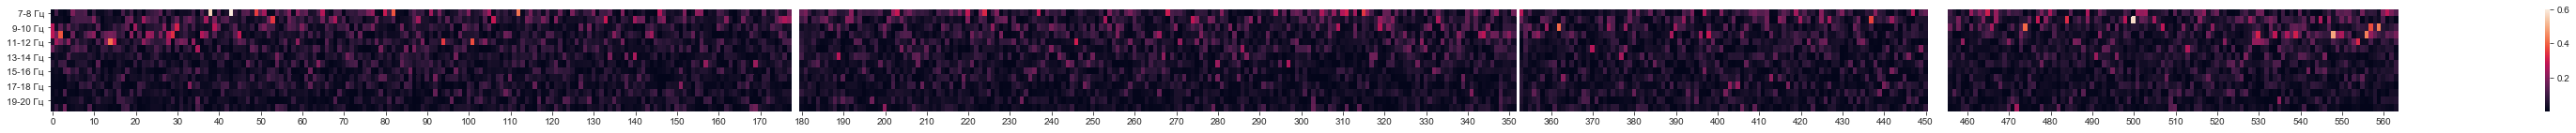

In [183]:
# для каждого файла собираем датафрейм, строим график и выгружаем в папку
for file in files:
    
    # собираем данные по отведению Fz (колонка "E"), со всех листов    
    df = pd.DataFrame(pd.read_excel(io = file, sheet_name = None,header = 17, usecols = "E", squeeze = True))
    
    
    # нормализуем значения    
    df = scaler(df)
    
    # определяем пропорции графика через длину файла с данными
    lenght = len(df)//10
    fig, ax = pyplot.subplots(figsize=(lenght, lenght//20))
    
    # строим фигуру (начиная с частоты 7-8Гц - df.T.iloc[7:21,:]) и сохраняем под именем файла
    heatmap = sns.heatmap(df.T.iloc[7:21,:],xticklabels=10)
    fig  = heatmap.get_figure()
    fig.savefig(f"{file}.png")